# IMAGE CLASSIFICATION CIFAR10 DATASET

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 93s 1us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_test.shape

(10000, 1)

In [40]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [42]:
y_train=y_train.reshape (-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

## Test image

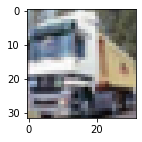

In [43]:
plt.figure (figsize = (15,2))
plt.imshow(x_train [1])


In [60]:
classes = ("airplane", "automobile", "bird", "cat", "deer", "dog","frog","horse","ship","truck")

In [61]:
classes [4]

'deer'

In [62]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

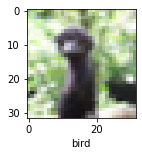

In [67]:
plot_sample(x_train, y_train, 55)

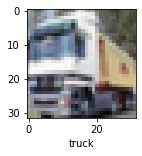

In [68]:
plot_sample(x_train, y_train, 1)

In [73]:
x_train= x_train/255.

In [75]:
x_test=x_test/255.

In [78]:
IMG_NN= models.Sequential([
    
    layers.Flatten (input_shape=(32,32,3)),
    layers.Dense (1000, activation= 'relu'),
    layers.Dense (1000, activation= 'relu'),
    layers.Dense (1000, activation= 'relu'),
    layers.Dense (10, activation= 'softmax'),
       ])

In [81]:
IMG_NN.compile (optimizer ='SGD',
               loss='sparse_categorical_crossentropy',
               metrics= ['accuracy'])

In [82]:
IMG_NN.fit (x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 1252s 801ms/step - loss: 1.8425 - accuracy: 0.3418
Epoch 2/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.6454 - accuracy: 0.4152
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5566 - accuracy: 0.4483
Epoch 4/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4916 - accuracy: 0.4718
Epoch 5/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4437 - accuracy: 0.4880


In [85]:
IMG_NN.evaluate (x_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.4995 - accuracy: 0.4685


[1.499462604522705, 0.4684999883174896]

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = IMG_NN.predict(x_test)
y_pred_classes =[np.argmax(element) for element in y_pred]
print ("Classification Report: \n", classification_report (y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.56      0.53      1000
           1       0.58      0.65      0.62      1000
           2       0.44      0.17      0.24      1000
           3       0.45      0.13      0.20      1000
           4       0.36      0.54      0.43      1000
           5       0.51      0.23      0.32      1000
           6       0.39      0.70      0.50      1000
           7       0.47      0.62      0.53      1000
           8       0.49      0.75      0.59      1000
           9       0.67      0.33      0.45      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.44     10000
weighted avg       0.49      0.47      0.44     10000



# CNN Network

In [89]:
IMG_CNN= models.Sequential([
    #Cnn
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    #dense
    layers.Flatten (),
    layers.Dense (64, activation= 'relu'),
    layers.Dense (10, activation= 'softmax'),
       ])

In [90]:
IMG_CNN.compile (optimizer ='adam',
               loss='sparse_categorical_crossentropy',
               metrics= ['accuracy'])

In [91]:
IMG_CNN.fit (x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 82s 46ms/step - loss: 1.4843 - accuracy: 0.4658
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1292 - accuracy: 0.6056
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0077 - accuracy: 0.6498
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9347 - accuracy: 0.6755
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8759 - accuracy: 0.6957
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8288 - accuracy: 0.7118
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7864 - accuracy: 0.7298
Epoch 8/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7456 - accuracy: 0.7415
Epoch 9/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7126 - accuracy: 0.7527
Epoch 10/10
1563/1563 [==============================] - 72s 46m

In [92]:
IMG_CNN.evaluate (x_test,y_test)

313/313 [==============================] - 27s 13ms/step - loss: 0.9254 - accuracy: 0.6953


[0.9253892302513123, 0.6952999830245972]

In [94]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

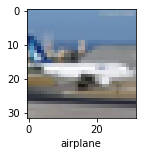

In [99]:
plot_sample(x_test,y_test,90)

In [100]:
p_pred =IMG_CNN.predict(x_test)
p_pred[:5]

array([[1.76498346e-04, 4.65430458e-06, 4.50175302e-03, 8.68539572e-01,
        1.04433029e-05, 1.09630406e-01, 6.42208569e-03, 9.07099729e-06,
        1.06353397e-02, 7.01555255e-05],
       [7.10706925e-03, 2.40345851e-01, 3.83603510e-05, 5.67076540e-06,
        2.20751531e-06, 9.95188202e-07, 5.55069562e-07, 1.09932182e-06,
        7.51200438e-01, 1.29773316e-03],
       [3.57673407e-01, 3.84422839e-02, 2.37896629e-02, 4.69761640e-02,
        3.24059576e-02, 1.27270548e-02, 2.75131245e-03, 9.45900381e-03,
        4.27596122e-01, 4.81791012e-02],
       [9.38119888e-01, 5.70179604e-04, 3.02918851e-02, 1.84706494e-03,
        1.09486394e-02, 5.52244783e-05, 4.32645204e-04, 3.15559337e-05,
        1.73797272e-02, 3.23178043e-04],
       [1.82675865e-06, 5.55259385e-06, 3.30388099e-02, 4.95769680e-02,
        2.06205070e-01, 7.30873225e-03, 7.03785479e-01, 2.98678642e-05,
        4.32760098e-05, 4.46780814e-06]], dtype=float32)

In [117]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[6, 8, 8, 8, 4, 6, 3, 4, 4, 1, 8, 9, 6, 7, 1]

In [118]:
y_test [:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

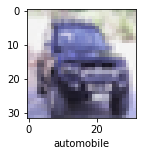

In [128]:
plot_sample(x_test,y_test,9)

In [127]:
classes[y_classes[9]]

'automobile'

In [129]:
print ("Classification Report: \n", classification_report (y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.56      0.53      1000
           1       0.58      0.65      0.62      1000
           2       0.44      0.17      0.24      1000
           3       0.45      0.13      0.20      1000
           4       0.36      0.54      0.43      1000
           5       0.51      0.23      0.32      1000
           6       0.39      0.70      0.50      1000
           7       0.47      0.62      0.53      1000
           8       0.49      0.75      0.59      1000
           9       0.67      0.33      0.45      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.44     10000
weighted avg       0.49      0.47      0.44     10000



In [131]:

print ("Classification Report: \n", classification_report (y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.56      0.53      1000
           1       0.58      0.65      0.62      1000
           2       0.44      0.17      0.24      1000
           3       0.45      0.13      0.20      1000
           4       0.36      0.54      0.43      1000
           5       0.51      0.23      0.32      1000
           6       0.39      0.70      0.50      1000
           7       0.47      0.62      0.53      1000
           8       0.49      0.75      0.59      1000
           9       0.67      0.33      0.45      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.44     10000
weighted avg       0.49      0.47      0.44     10000

